In [1]:
import os
import glob
import scipy as sp
from scipy import signal
import pandas as pd
import numpy as np
import tensorflow as tf
tf.random.set_seed(1)
import tensorflow.keras as keras
from keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, GaussianNoise
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from frechetdist import frdist
import random
import dffuncs as dff

In [2]:
df = pd.read_csv('./Dataset/SLG_Addnoise.csv',index_col=0)

print("Successfuly loaded the dataset")
df                                          # Showing the data


Successfuly loaded the dataset


,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,...,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y
Raman_shift,,,,,,,,,,,,,,,,,,,,,
1200.0000,0.000000,1.404581,1.663983,1.938654,1.743433,2.090577,-0.235612,0.972605,1.677833,1.847457,...,1.721843,1.100934,1.924200,2.306466,-0.836125,0.173668,1.355233,1.685968,1.132606,1.937956
1201.3730,0.730420,0.000000,1.099328,0.583766,1.849403,1.882755,0.932745,0.029391,1.513906,0.065758,...,1.951593,0.172570,1.724993,1.767743,0.850280,-0.596435,1.190994,-0.793383,2.434924,1.747137
1202.7460,0.645077,0.657731,1.080033,1.151649,1.526617,1.033416,0.611560,0.538099,0.739375,1.300242,...,1.145519,1.223879,2.405732,0.720692,0.179017,1.179077,0.725341,1.295348,2.488997,2.177391
1204.1190,0.799697,0.922754,1.150741,1.301235,1.690798,1.548109,0.302350,1.272406,0.927590,0.821099,...,1.809875,1.063718,1.333538,1.177875,0.846371,0.888416,1.106804,0.580002,1.271620,1.930165
1205.4919,0.826323,0.798872,1.184735,1.094814,0.920382,1.594952,0.991100,0.746124,0.946738,1.260772,...,1.410725,0.706152,1.669088,1.554358,0.568475,0.576215,0.951796,1.750366,1.641322,1.460223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994.5081,0.960957,0.530946,0.436557,0.945580,0.497819,0.840166,1.501268,0.705952,0.743815,1.013741,...,0.804757,1.121544,1.159457,1.847926,1.359938,0.490530,0.586853,0.903572,0.989652,0.682415
2995.8811,0.000000,0.854924,0.000000,0.860699,0.056295,1.034529,-0.463662,1.293799,-0.650632,0.222794,...,0.334634,0.992659,1.034367,1.876424,-0.453422,1.085737,-0.222072,0.154660,0.134499,0.823501
2997.2539,0.490173,0.627753,0.587903,0.617913,0.453237,1.195195,0.559538,0.893480,0.359402,0.237151,...,0.758758,0.008117,1.506799,2.428715,-0.088981,0.908985,0.960506,-0.449352,1.219324,0.424711


<Axes: xlabel='Raman_shift'>

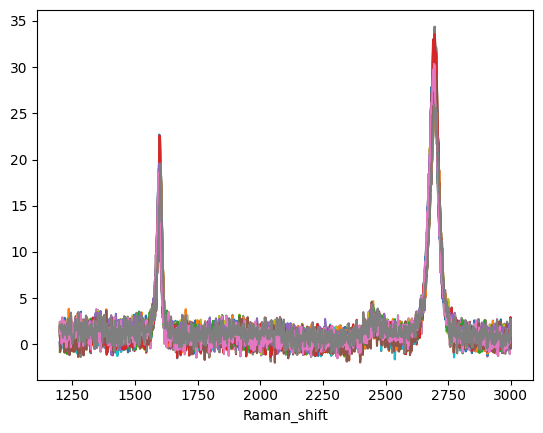

In [3]:
df.plot(legend=False)

In [29]:
df = dff.transpose(df)
df


Raman_shift,1200.0000,1201.3730,1202.7460,1204.1190,1205.4919,1206.8650,1208.2380,1209.6110,1210.9840,1212.3569,...,2987.6431,2989.0161,2990.3889,2991.7620,2993.1350,2994.5081,2995.8811,2997.2539,2998.6270,3000.0000
1_x,0.000000,0.730420,0.645077,0.799697,0.826323,0.785203,1.268609,0.913845,1.124662,0.920947,...,1.376307,0.719529,0.493227,0.813149,0.972333,0.960957,0.000000,0.490173,0.785717,0.283426
2_x,1.404581,0.000000,0.657731,0.922754,0.798872,0.637131,0.459986,0.730020,0.786784,0.579826,...,0.723473,0.758609,0.888621,1.162021,0.011522,0.530946,0.854924,0.627753,0.466526,0.000000
3_x,1.663983,1.099328,1.080033,1.150741,1.184735,1.214450,1.380184,2.021780,1.129352,1.621206,...,1.162972,0.772817,0.886620,0.533660,0.912050,0.436557,0.000000,0.587903,0.377413,0.909987
4_x,1.938654,0.583766,1.151649,1.301235,1.094814,0.960677,0.868312,0.388264,1.050212,1.337230,...,0.896862,0.620176,0.617363,0.721224,0.654511,0.945580,0.860699,0.617913,0.697131,0.927572
5_x,1.743433,1.849403,1.526617,1.690798,0.920382,0.000000,1.539025,1.622090,1.964851,1.408627,...,0.582388,0.863640,0.705981,0.000000,0.741550,0.497819,0.056295,0.453237,0.659950,0.000000
6_x,2.090577,1.882755,1.033416,1.548109,1.594952,1.020771,1.837583,1.427409,1.651569,1.366792,...,1.212571,0.819395,0.395361,0.613818,0.710313,0.840166,1.034529,1.195195,1.663396,0.927313
7_x,-0.235612,0.932745,0.611560,0.302350,0.991100,1.013335,1.112104,0.598114,1.365194,0.987306,...,1.338207,0.817456,0.149567,0.853924,1.440362,1.501268,-0.463662,0.559538,0.903239,0.087244
8_x,0.972605,0.029391,0.538099,1.272406,0.746124,1.045462,0.332219,0.635059,0.702679,0.746722,...,0.527339,0.815612,0.537148,0.798869,0.212429,0.705952,1.293799,0.893480,0.500440,0.232112
9_x,1.677833,1.513906,0.739375,0.927590,0.946738,0.863366,1.355347,1.644427,1.349941,1.510245,...,1.593340,1.373425,0.412656,0.171446,0.665334,0.743815,-0.650632,0.359402,0.305538,0.694254
10_x,1.847457,0.065758,1.300242,0.821099,1.260772,0.755114,1.116126,0.231141,1.334352,1.719580,...,0.939308,0.625632,0.457365,0.856224,0.936788,1.013741,0.222794,0.237151,0.925682,0.842059


In [30]:
# Keeping the index labels (wavelength) for later use (for plotting etc.)
df.columns= df.columns.astype(float)
column_labels = df.columns.tolist
column_labels

<bound method IndexOpsMixin.tolist of Float64Index([   1200.0,  1201.373,  1202.746,  1204.119, 1205.4919,  1206.865,
               1208.238,  1209.611,  1210.984, 1212.3569,
              ...
              2987.6431, 2989.0161, 2990.3889,  2991.762,  2993.135, 2994.5081,
              2995.8811, 2997.2539,  2998.627,    3000.0],
             dtype='float64', name='Raman_shift', length=1312)>

In [31]:
# Converting the data to numpy array
data_raw = df.to_numpy()
print(f'Raw data shape: {data_raw.shape}')  # Sanity check of shapes

Raw data shape: (48, 1312)


In [32]:
data_processed = data_raw

# Slicing the data

train_data = data_processed[:int(data_processed.shape[0]*0.8), :]                # training set split
print(train_data)
test_data = data_processed[int(data_processed.shape[0]*0.8):, :]                 # test set split
print("Train dataset shape: {}".format(train_data.shape))
print("Test dataset shape: {}".format(test_data.shape))

[[ 0.          0.73042047  0.64507681 ...  0.49017286  0.78571737
   0.28342634]
 [ 1.4045814   0.          0.65773147 ...  0.62775272  0.46652624
   0.        ]
 [ 1.6639833   1.0993279   1.0800326  ...  0.58790326  0.37741277
   0.90998715]
 ...
 [ 2.23349406  1.94031066  1.75322386 ...  1.03014156  2.03970049
   0.87199278]
 [ 0.11328157  0.03782114  0.93288939 ... -0.1237811   0.47826667
   0.25516549]
 [ 1.47263472  0.15875008  0.96163646 ...  0.41758332  1.08388141
  -0.32853382]]
Train dataset shape: (38, 1312)
Test dataset shape: (10, 1312)


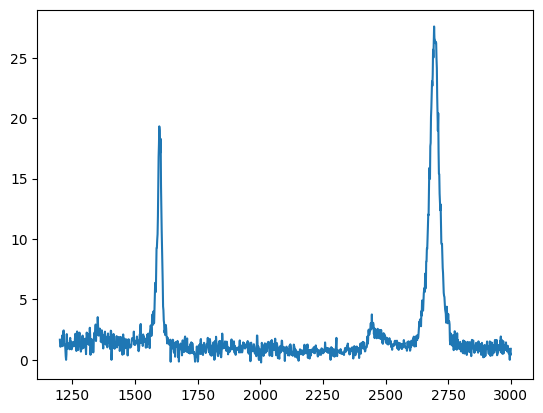

In [33]:
plt.plot(df.T.index.astype(float), train_data[2])

In [34]:
BATCH_SIZE = 4                        # (opt) Tested for our dataset to be the most suitable
data_size = train_data.shape[0]           # Number of data_points
train_dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(data_size).batch(BATCH_SIZE)         # Shuffle and build the train dataset
train_dataset

<BatchDataset element_spec=TensorSpec(shape=(None, 1312), dtype=tf.float64, name=None)>

In [35]:
feature_dim = train_data.shape[1]

noise_dim = feature_dim            # Dimension of the input noise vector to the generator (opt)

# Dimension of each feature (row)
feature_dim

1312

In [36]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Input((noise_dim)))

    # Fully Connected Layers
    #(opt) (number of nodes can change and activation may be relu or leaky relu)

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(layers.Dense(256, activation="leaky_relu"))
    model.add(layers.Dense(feature_dim))
    model.compile()

    print(model.output_shape)
    assert model.output_shape == (None, feature_dim)

    return model

In [37]:
layers.Dense(feature_dim)

In [38]:
generator = make_generator_model()
generator.summary()

(None, 1312)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               168064    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 1312)              337184    
                                                                 
Total params: 538,784
Trainable params: 538,528
Non-trainable params: 256
___________________________________

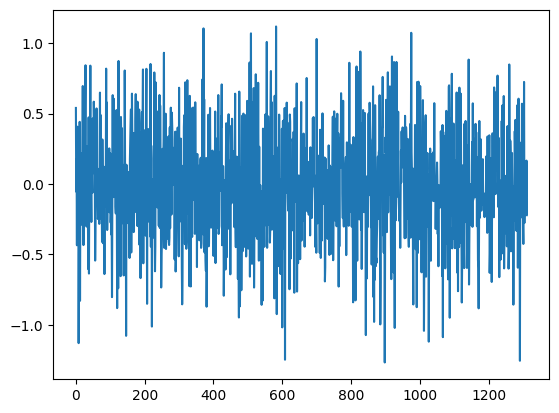

In [39]:
noise = tf.random.normal([1, noise_dim])
generated_data = generator(noise, training=False)
generated_data_ = generated_data.numpy().reshape(-1).tolist()
plt.plot(generated_data_)

In [40]:
def make_discriminator_model():

    # Implementing a ConvNet discriminator
    model = tf.keras.Sequential()

    model.add(layers.Input(shape= (feature_dim)))
    model.add(layers.Reshape([feature_dim, 1]))
    model.add(layers.Conv1D(kernel_size= 15, filters= 256, activation='leaky_relu'))  #(opt) (number of filters and kernel size)
    model.add(layers.MaxPool1D())
    model.add(layers.Dropout(0.2))                                                      #(opt) (dropout probability)

    model.add(layers.Conv1D(kernel_size= 15, filters= 128))    #(opt) (number of filters and kernel size)
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(layers.MaxPool1D())
    model.add(layers.Dropout(0.2))                                                      #(opt) (dropout probability)

    model.add(layers.Flatten())
    model.add(layers.Dense(64))                                                         #(opt) (number of nodes in layer)
    model.add(layers.Dense(1))
    model.compile()

    return model

In [41]:
discriminator = make_discriminator_model()
decision = discriminator(generated_data)            # Get real or fake for the input we just got out of the generator
decision
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               168064    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 1312)              337184    
                                                                 
Total params: 538,784
Trainable params: 538,528
Non-trainable params: 256
________________________________________________

In [42]:
# Computation of cross entropy loss

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Definining the discriminator loss

def discriminator_loss(real_output, fake_output):
    return cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)

# Defining the generator loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [43]:
# Defining training optimizers

generator_optimizer = tf.keras.optimizers.Adam(1e-5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-5)

In [44]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [45]:
seed = tf.random.normal([1, noise_dim])   # Fixed input noise distribution to monitor training effect on that distribution

def draw_training_evolution(model, epoch, noise_input= seed):
  """
    Function that takes in the generator model, epoch number, and
    does a prediction and plots the generated singal then saves it.
  """
  # `training` is set to False.
  # Thus, all layers run in inference mode (batchnorm).
  predictions = model(noise_input, training=False)

  for i in range(predictions.shape[0]):
    fig = plt.figure()
    plt.plot(predictions[i].numpy().tolist())
    plt.savefig('output/evolution/image_at_epoch_{:04d}_{:04d}.png'.format(epoch, i))
    plt.close()

def generate_data(model, num_synthetic_to_gen=1):
  """
    Function that takes in the generator model and
    does a prediction and returns it as a numpy array.
  """
  noise_input = tf.random.normal([num_synthetic_to_gen, noise_dim])
  predictions = model(noise_input, training=False)
  predictions = predictions.numpy()
  return predictions

def calc_accuracy(prediction):
  """
    Function that takes in the some data judgements
    from the discriminator and get the average of
    judgements that indicate how the discriminator is fooled.
  """
  prediction_clipped = tf.clip_by_value(prediction, 0.0, 1.0, name=None)
  return tf.reduce_mean(prediction_clipped)

In [46]:
# `tf.function` # This annotation causes the function to be "compiled".
@tf.function
def train_step(data):
    """
      Function for implementing one training step
      of the GAN model
    """
    noise = tf.random.normal([BATCH_SIZE, noise_dim], seed=1)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_data = generator(noise, training=True)

      real_output = discriminator(data, training=True)
      fake_output = discriminator(generated_data, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      acc = calc_accuracy(fake_output)



    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, acc

In [48]:
numofEPOCHS = 10000 #(opt)
def train(dataset, epochs):
  """
    Main GAN Training Function
  """
  epochs_gen_losses, epochs_disc_losses, epochs_accuracies = [], [], []

  for epoch in range(epochs):
    start = time.time()

    gen_losses, disc_losses, accuracies = [], [], []

    for data_batch in dataset:
      gen_loss, disc_loss, acc = train_step(data_batch)
      accuracies.append(acc)
      gen_losses.append(gen_loss)
      disc_losses.append(disc_loss)

    epoch_gen_loss  = np.average(gen_losses)
    epoch_disc_loss = np.average(disc_losses)
    epoch_accuracy = np.average(accuracies)
    epochs_gen_losses.append(epoch_gen_loss)
    epochs_disc_losses.append(epoch_disc_loss)
    epochs_accuracies.append(epoch_accuracy)
    print("Epoch: {}/{}".format(epoch+1, epochs))
    print("Generator Loss: {}, Discriminator Loss: {}".format(epoch_gen_loss, epoch_disc_loss))
    print("Accuracy: {}".format(epoch_accuracy))

    # Draw the model every 2 epochs
    if (epoch + 1) % 2 == 0:
      draw_training_evolution(generator, epoch+1)

    # Save the model every 2 epochs for the last 2000 epochs
    if (epoch + 1) % 2 == 0 and epoch > (numofEPOCHS - 2000):
      checkpoint.save(file_prefix = checkpoint_prefix)   # Comment not to save model checkpoints while training


  return epochs_gen_losses, epochs_disc_losses, epochs_accuracies

In [49]:
EPOCHS = numofEPOCHS

epochs_gen_losses, epochs_disc_losses, epochs_accuracies = train(train_dataset, EPOCHS)

Epoch: 1/10000
Generator Loss: 2.2903850078582764, Discriminator Loss: 0.725725531578064
Accuracy: 0.09158287197351456
Epoch: 2/10000
Generator Loss: 5.1863908767700195, Discriminator Loss: 0.021316442638635635
Accuracy: 0.0
Epoch: 3/10000
Generator Loss: 6.502528190612793, Discriminator Loss: 0.003798455698415637
Accuracy: 0.0
Epoch: 4/10000
Generator Loss: 6.838792324066162, Discriminator Loss: 0.0029829025734215975
Accuracy: 0.0
Epoch: 5/10000
Generator Loss: 6.926199436187744, Discriminator Loss: 0.002374242292717099
Accuracy: 0.0
Epoch: 6/10000
Generator Loss: 6.6702880859375, Discriminator Loss: 0.0028670465108007193
Accuracy: 0.0
Epoch: 7/10000
Generator Loss: 7.0212082862854, Discriminator Loss: 0.002203481737524271
Accuracy: 0.0
Epoch: 8/10000
Generator Loss: 6.814243316650391, Discriminator Loss: 0.002553046215325594
Accuracy: 0.0
Epoch: 9/10000
Generator Loss: 6.619595527648926, Discriminator Loss: 0.002767421305179596
Accuracy: 0.0
Epoch: 10/10000
Generator Loss: 6.50477313

<Figure size 640x480 with 0 Axes>

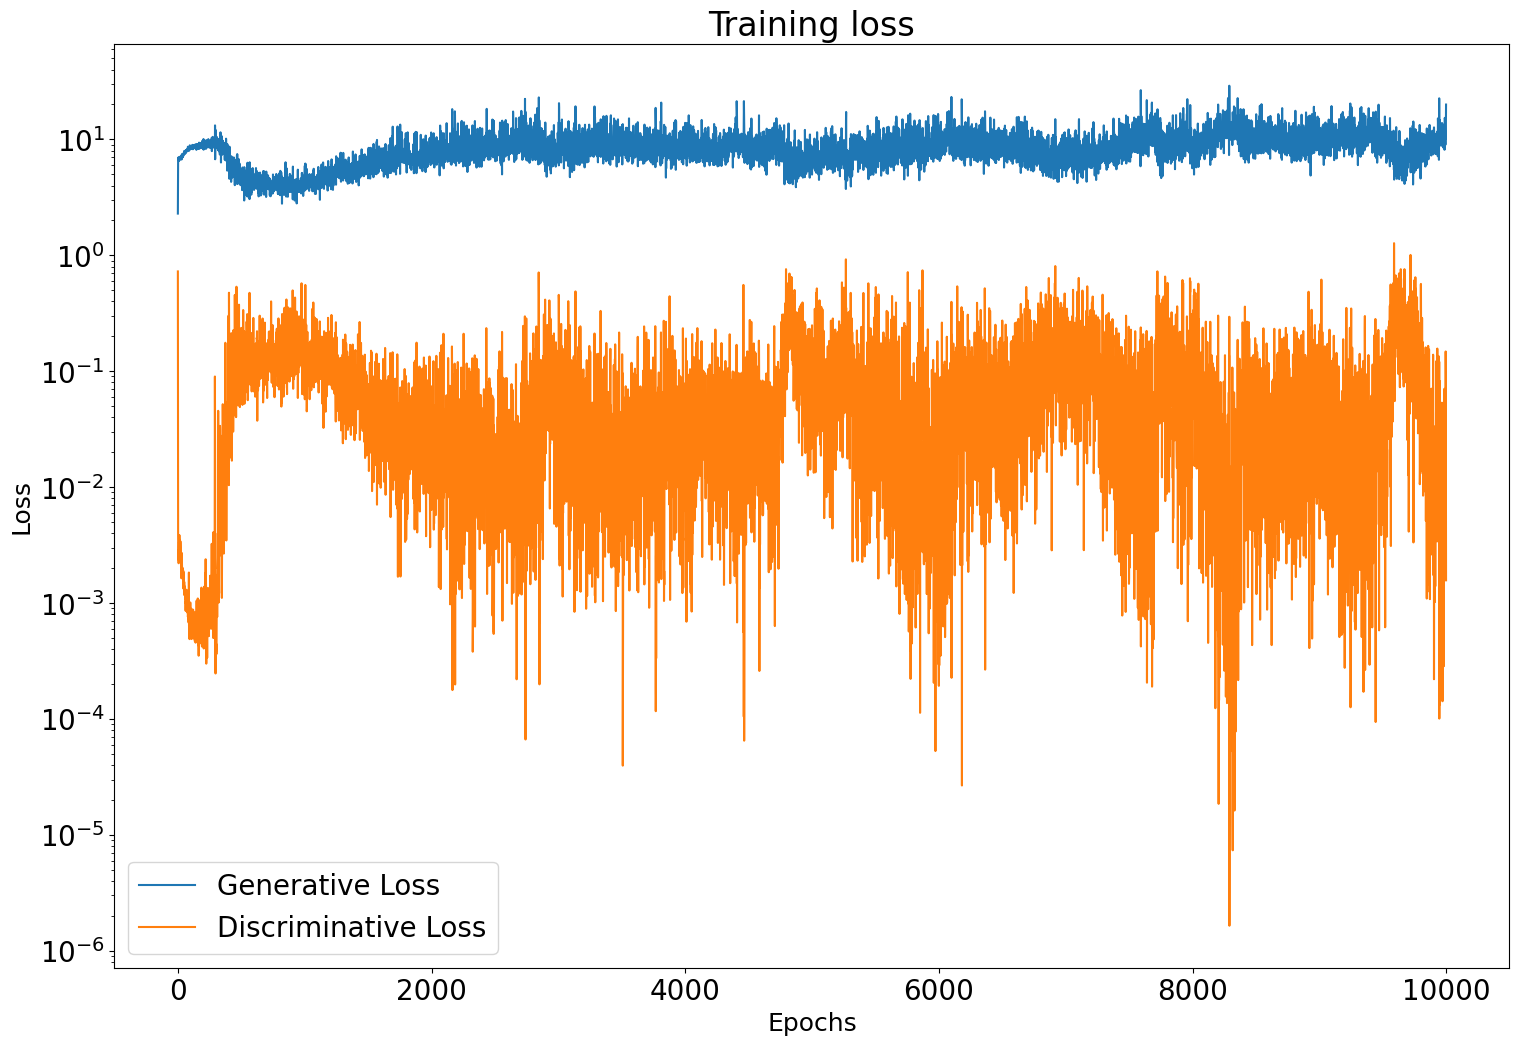

In [50]:
plt.figure()
plt.rcParams.update({'font.size': 20}) # must be set on top
ax = pd.DataFrame(
    {
        'Generative Loss': epochs_gen_losses,
        'Discriminative Loss': epochs_disc_losses,
    }
).plot(title='Training loss', logy=True, figsize=(18,12))
ax.set_xlabel("Epochs", fontsize=18)
ax.set_ylabel("Loss", fontsize=18)

# Save figure using 600 dpi
plt.savefig("training.png", dpi=300)
plt.show()

In [51]:
# Save the model
generator.save('models/generator_model23o.ckpt', overwrite=True)

INFO:tensorflow:Assets written to: models/generator_model23o.ckpt\assets


INFO:tensorflow:Assets written to: models/generator_model23o.ckpt\assets


In [52]:
def get_rmse(synthetic_datapoint, original_datapoint):
    """
        Function that calculates the RMS between two datapoints
    """
    return np.sqrt(np.average((synthetic_datapoint - original_datapoint)**2))


def get_rmse_on_batch(synthetic_data, test_dataset):
    """
        Function that calculates the minimum RMS between
        a batch of synthetic datapoints and a batch of test samples
    """

    rmse_all = []

    for gen in synthetic_data:
        rmse = np.inf
        for test_datapoint in test_dataset:
            current_rmse = get_rmse(gen, test_datapoint)
            if current_rmse < rmse:
                rmse = current_rmse
        rmse_all.append(rmse)

    return np.average(rmse_all)

In [53]:
def get_prmsd(synthetic_datapoint, original_datapoint):
    """
        Function that calculates the percent root mean square
        difference between two datapoints
    """
    return np.sqrt(100 * (np.sum((synthetic_datapoint - original_datapoint)**2)) / (np.sum(synthetic_datapoint**2)))

def get_prmsd_on_batch(synthetic_data, test_dataset):
    """
        Function that calculates the minimum percent root mean square
        difference between a batch of synthetic
        datapoints and a batch of test samples
    """

    prmsd_all = []

    for gen in synthetic_data:
        prmsd = np.inf
        for test_datapoint in test_dataset:
            current_prmsd = get_prmsd(gen, test_datapoint)
            if current_prmsd < prmsd:
                prmsd = current_prmsd
        prmsd_all.append(prmsd)

    return np.average(prmsd_all)

In [54]:
def get_mae(synthetic_datapoint, original_datapoint):
    """
        Function that calculates the mean absolute
        error between two datapoints
    """
    return np.average(np.abs(synthetic_datapoint - original_datapoint))

def get_mae_on_batch(synthetic_data, test_dataset):
    """
        Function that calculates the minimum mean absolute
        error between a batch of synthetic datapoints and a batch of test samples
    """

    mae_all = []

    for gen in synthetic_data:
        mae = np.inf
        for test_datapoint in test_dataset:
            current_mae = get_mae(gen, test_datapoint)
            if current_mae < mae:
                mae = current_mae
        mae_all.append(mae)

    return np.average(mae_all)

In [55]:
batch = generate_data(generator, num_synthetic_to_gen= 10)
rmse_ = get_rmse_on_batch(batch, test_data)
prmsd_ = get_prmsd_on_batch(batch, test_data)
mae_ = get_mae_on_batch(batch, test_data)
print("RMSe at Testing Dataset: {}".format(rmse_))
print("PRMSD at Testing Dataset: {}".format(prmsd_))
print("MAE at Testing Dataset: {}".format(mae_))

RMSe at Testing Dataset: 0.9833126927363308
PRMSD at Testing Dataset: 2.0547983984251257
MAE at Testing Dataset: 0.7279522381548886


In [56]:
def save_data_to_csv(data, filepath):
    """
        Function that takes in the data as numpy array,
        converts to pandas dataframe and then saves the .csv file.
    """
   # columns = ["Column{}".format(i) for i in range(data.shape[1])]


    df = pd.DataFrame(data, columns= column_labels())
    df.to_csv(filepath)

def draw_generated_figures(data, folderpath):
    """
        Function that takes in the generated batch of data
        and saves the corresponding signal outputs as figures
    """
    for i in range(data.shape[0]):
        fig = plt.figure()
        plt.plot(data[i].tolist(), 'r')
        plt.savefig(folderpath + '/generated_sample_{:04d}.png'.format(i))
        plt.close()


In [57]:
# Generating samples
generated_batch = generate_data(generator, num_synthetic_to_gen=1000)
os.chdir('D:/tBLG-4classify')
# Undoing any normalization that happened
# generated_batch = ((generated_batch * std_dev) + means).astype(np.int32)     # Converting to ints
save_data_to_csv(generated_batch, 'output/csv/samples1000.csv')
draw_generated_figures(generated_batch, 'output/generated_samples')
print("Saved successfully!")

Saved successfully!


In [58]:
loaded_generator = tf.keras.models.load_model('models/generator_model23o.ckpt')        # Load the model
loaded_generator.compile()                                                          # Compile the model
generated_data = generate_data(generator, num_synthetic_to_gen=1)
print(generated_data)

[[3.4881382  3.277345   1.873524   ... 0.50496274 0.23388618 0.6292147 ]]


In [59]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest
checkpoint.restore(latest)
generator(noise)

<tf.Tensor: shape=(1, 1312), dtype=float32, numpy=
array([[3.5283155 , 3.3771615 , 2.0917406 , ..., 0.52913135, 0.18409409,
        0.63553387]], dtype=float32)>

In [60]:
# Save the checkpoints as spectra
for x in range(1000):
    checkpoint.restore('./training_checkpoints/ckpt-' + str(x+1))
    checkpoint.generator(noise)
    generated_batch = generate_data(generator, num_synthetic_to_gen=1)
    save_data_to_csv(generated_batch, 'output/cp/synth_o_raw_bz4_bn_GN00_model23_cp' + str(x+1) + '.csv')
print("Saved successfully!")

Saved successfully!


In [61]:
cwd = os.getcwd()
print(cwd) # Sanity check: being in the correct directory

D:\tBLG-4classify
